<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Knapsack_Problem_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knapsack Problem

You're given an array of arrays where each subarray holds two integer values and represents an item; the first integer is the item's value, and the second integer is the item's weight. You're also given an integer representing the maximum capacity of a knapsack that you have.

Your goal is to fit items in your knapsack without having the sum of their weights exceed the knapsack's capacity, all the while maximizing their combined value. Note that you only have one of each item at your disposal.

Write a function that returns the maximized combined value of the items that you should pick as well as an array of the indices of each item picked.

If there are multiple combinations of items that maximize the total value in the knapsack, your function can return any of them.

Sample Input

```
items = [[1, 2], [4, 3], [5, 6], [6, 7]]
capacity = 10
```



Sample Output

```
[10, [1, 3]] // items [4, 3] and [6, 7]
```



In [ ]:
# Time O(n*capacity)
# Space O(n*capacity)

def knapsackProblem(items, capacity):
  knapsack_value = [[0 for _ in range(capacity + 1)] for _ in range(len(items) + 1)]

  for row in range(1, len(items) + 1):
    item_idx = row - 1
    current_item_value, current_item_wt = items[item_idx]
    for current_capacity in range(capacity + 1):
      if current_capacity - current_item_wt >= 0:
        knapsack_value[row][current_capacity] = max(knapsack_value[row - 1][current_capacity], current_item_value + knapsack_value[row - 1][current_capacity - current_item_wt])
      else:
        knapsack_value[row][current_capacity] = knapsack_value[row - 1][current_capacity]


  optimized_value = knapsack_value[-1][-1]
  optimized_items_idx_list = get_items_idx_list(knapsack_value, items)

  return [optimized_value, optimized_items_idx_list]


def get_items_idx_list(knapsack_value, items):
  optimized_items_idx_list = []
  current_capacity = len(knapsack_value[0]) - 1
  row = len(knapsack_value) - 1
  
  while row > 0:
    if knapsack_value[row][current_capacity] == knapsack_value[row - 1][current_capacity]:
      row -= 1
    else:
      item_idx = row - 1
      optimized_items_idx_list.append(item_idx)
      current_capacity -= items[item_idx][1]
      row -= 1

  return list(reversed(optimized_items_idx_list))

In [ ]:
items = [[1, 2], [4, 3], [5, 6], [6, 7]]
capacity = 10
knapsackProblem(items, capacity)

[10, [1, 3]]

In [ ]:
items = [[465, 100], [400, 85], [255, 55], [350, 45], [650, 130], [1000, 190],
    [455, 100], [100, 25], [1200, 190], [320, 65], [750, 100], [50, 45], [550, 65], [100, 50], [600, 70], [240, 40]]
capacity = 200
knapsackProblem(items, capacity)

[1500, [3, 12, 14]]

# Conceptual Note

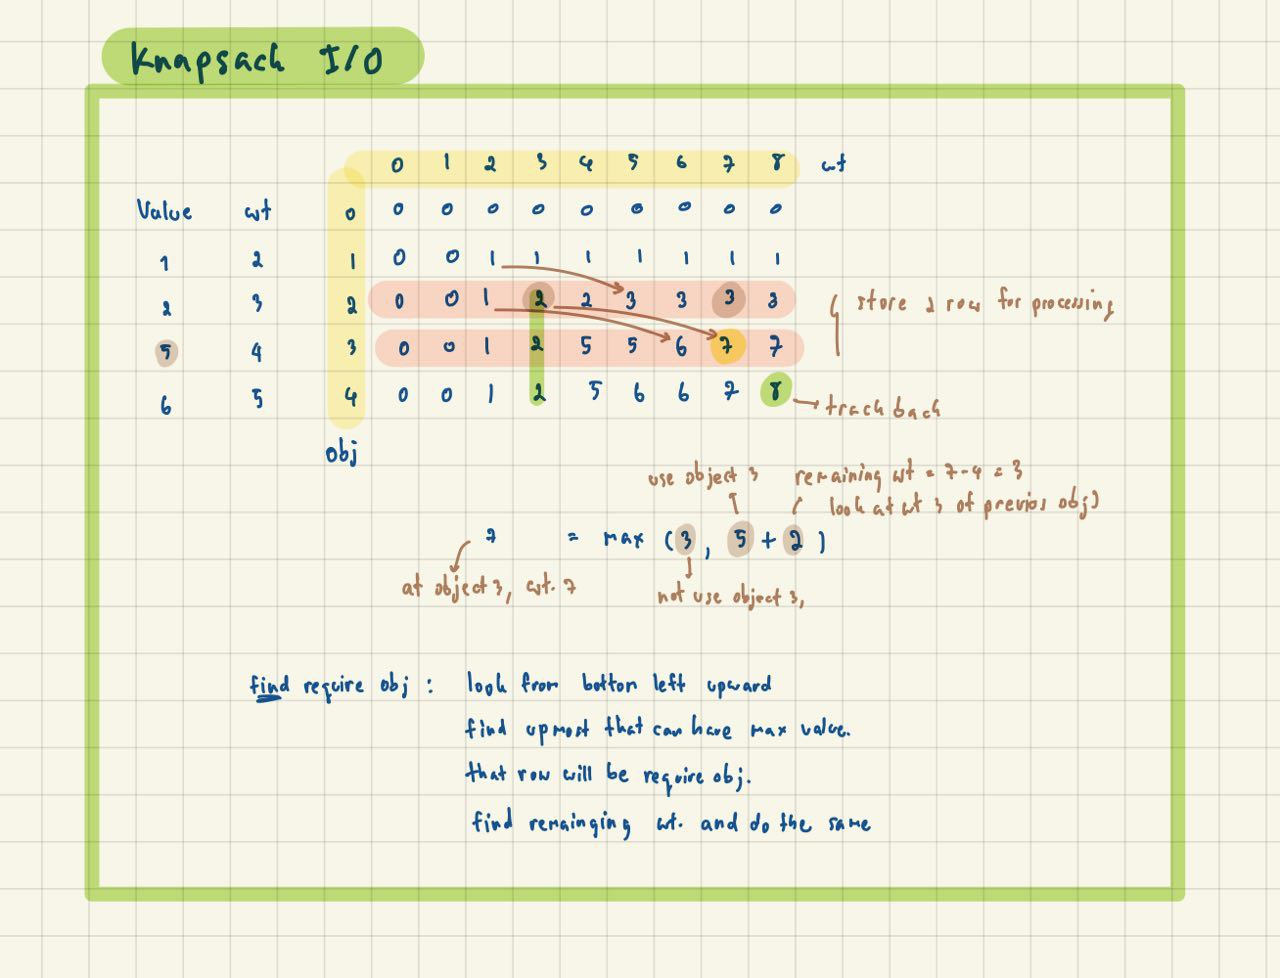